In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\I Dati\\Prosperity.csv')
df.head(2)

,Country,GDP Per Capita,Technology,Human Capital,Institutional Framework,Sustainable Resources,Demand Environment,Education,Happiness,Unemployment Rate,Population,Import Degree,Import Eigenvector,Import Betweenness,Export Degree,Export Eigenvector,Export Betweenness,Location
0,Albania,5260.9,3.40,4.62,4.7,6.19,3.16,1153,4.719,0.120,2880248,0,0.000000,0.0,0,0.000000,0.0,Europe
1,Algeria,4449.8,2.97,3.58,3.6,5.36,5.00,1086,5.211,0.117,43216262,3,0.022113,0.0,3,0.029143,0.0,Africa


In [3]:
def plot_quantiles(data, cat_column, num_column):
    
    """
    PLots 1st and 3rd quantiles.
    """
    
    from warnings import filterwarnings
    filterwarnings("ignore")
    
    order = np.array(data.groupby(cat_column)[num_column].quantile(0.75).index)
        
    
    plt.figure(figsize=(20,20))
    
    plt.subplot(4,1,1)
    data.groupby(cat_column)[num_column].quantile(0.75).plot()
    plt.xlabel("Quantile 3")
    
    
    plt.subplot(4,1,2)
    data.groupby(cat_column)[num_column].quantile(0.25).plot()
    plt.xlabel("Quantile 1")
    
    plt.subplot(4,1,3)
    data.groupby(cat_column)[num_column].median().plot(color = 'g')
    plt.xlabel("Median")
    
    plt.subplot(4,1,4)
    sns.boxplot(data = data, x = cat_column, y=num_column, order = order) 
    
def percentage_error(dataframe,pred, true_value):
        
    difference = dataframe[true_value] - dataframe[pred]
    
    dataframe['Error(%)']= np.absolute(difference/dataframe[true_value]*100)
    
    print('median \t {}'.format(dataframe['Error(%)'].median()))    
    print(dataframe['Error(%)'].describe())
    
def adjusted_r_squared(r2, data):
    
    x = (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-x

In [52]:
cols = ['Technology', 'Human Capital','Institutional Framework', 
        
       'Sustainable Resources',
       'Demand Environment', 'Education', 'Happiness', 'Unemployment Rate',
       'Population', 'Export Eigenvector',
        'Location','GDP Per Capita']

df = df[cols]

In [53]:
df.shape

(100, 12)

In [54]:
X = df.iloc[:, 2:12]
y = df.iloc[:, 0:2].values

In [35]:
X = df.drop('GDP Per Capita', axis =1)
y = df['GDP Per Capita'].values

In [55]:
X = pd.get_dummies(X)
X.drop('Location_Europe', inplace = True, axis =1)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15 )

In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input

In [104]:
inputs = Input(shape=(15,), name='MultipleOutputs')
layer1 = Dense(20, activation='relu')(inputs)
layer2 = Dense(20, activation='relu')(layer1)
layer3 = Dense(20, activation='relu')(layer2)

output = Dense(2, activation='relu')(layer3)
model = Model(inputs, output)

model.compile(optimizer='adam', loss= 'mse')

In [105]:
result = model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=100, verbose = 1)

Train on 85 samples, validate on 15 samples
Epoch 1/100
85/85 [==============================] - 1s 9ms/sample - loss: 26.2905 - val_loss: 27.9306
Epoch 2/100
85/85 [==============================] - 0s 305us/sample - loss: 26.0069 - val_loss: 27.6150
Epoch 3/100
85/85 [==============================] - 0s 340us/sample - loss: 25.6821 - val_loss: 27.2782
Epoch 4/100
85/85 [==============================] - 0s 305us/sample - loss: 25.3198 - val_loss: 26.8949
Epoch 5/100
85/85 [==============================] - 0s 293us/sample - loss: 24.9558 - val_loss: 26.4614
Epoch 6/100
85/85 [==============================] - 0s 282us/sample - loss: 24.5555 - val_loss: 25.9982
Epoch 7/100
85/85 [==============================] - 0s 375us/sample - loss: 24.1149 - val_loss: 25.5137
Epoch 8/100
85/85 [==============================] - 0s 399us/sample - loss: 23.6161 - val_loss: 24.9873
Epoch 9/100
85/85 [==============================] - 0s 340us/sample - loss: 23.0944 - val_loss: 24.4049
Epoch 10/100


85/85 [==============================] - 0s 434us/sample - loss: 0.3224 - val_loss: 0.5865
Epoch 72/100
85/85 [==============================] - 0s 340us/sample - loss: 0.3192 - val_loss: 0.5744
Epoch 73/100
85/85 [==============================] - 0s 375us/sample - loss: 0.3168 - val_loss: 0.5609
Epoch 74/100
85/85 [==============================] - 0s 411us/sample - loss: 0.3146 - val_loss: 0.5520
Epoch 75/100
85/85 [==============================] - 0s 329us/sample - loss: 0.3113 - val_loss: 0.5507
Epoch 76/100
85/85 [==============================] - 0s 458us/sample - loss: 0.3092 - val_loss: 0.5493
Epoch 77/100
85/85 [==============================] - 0s 493us/sample - loss: 0.3061 - val_loss: 0.5560
Epoch 78/100
85/85 [==============================] - 0s 516us/sample - loss: 0.3036 - val_loss: 0.5597
Epoch 79/100
85/85 [==============================] - 0s 422us/sample - loss: 0.3013 - val_loss: 0.5594
Epoch 80/100
85/85 [==============================] - 0s 469us/sample - loss:

<AxesSubplot:>

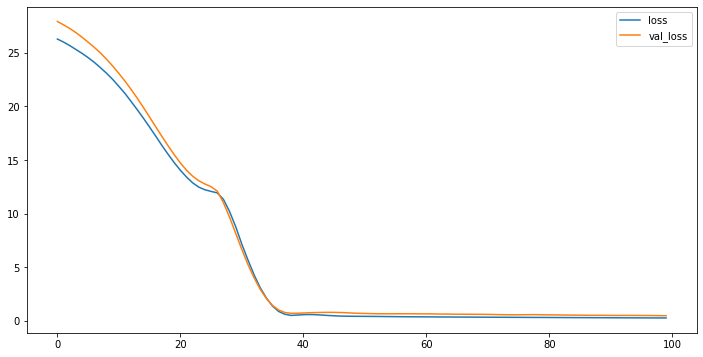

In [106]:
losses = pd.DataFrame(result.history)
losses.plot(figsize=(12,6))

In [107]:
y_pred = model.predict(X_test)

In [44]:
y_pred = np.reshape(y_pred, (15,))

In [112]:
y_test[:,0]

array([3.55, 7.31, 3.78, 4.73, 3.85, 3.51, 7.08, 5.49, 3.28, 8.05, 4.54,
       3.19, 3.2 , 4.76, 4.43])

In [113]:
y_pred[:,0]

array([3.009239 , 6.916792 , 3.8652575, 4.766677 , 4.260861 , 2.8721046,
       6.8851457, 5.0063176, 3.588891 , 6.650265 , 4.719137 , 3.029157 ,
       3.4689112, 3.793179 , 4.5213456], dtype=float32)

In [120]:
df.head()

,Technology,Human Capital,Institutional Framework,Sustainable Resources,Demand Environment,Education,Happiness,Unemployment Rate,Population,Export Eigenvector,Location,GDP Per Capita
0,3.40,4.62,4.70,6.19,3.16,1153,4.719,0.120,2880248,0.000000,Europe,5260.9
1,2.97,3.58,3.60,5.36,5.00,1086,5.211,0.117,43216262,0.029143,Africa,4449.8
2,3.78,4.94,4.16,5.84,4.99,1187,6.086,0.101,44866075,0.038238,South America,10667.1
3,3.53,5.07,4.93,5.85,3.68,1345,4.559,0.169,2958996,0.000000,Middle East,4190.2
4,6.91,7.41,8.32,6.47,5.78,1556,7.228,0.052,25265536,0.129649,Oceania,56698.1


In [114]:
test0_ANN = pd.DataFrame()
test0_ANN['TrueValues'] = y_test[:,0]
test0_ANN['Predictions'] = y_pred[:,0]

In [115]:
percentage_error(test0_ANN, 'Predictions', 'TrueValues')

median 	 8.403474092483515
count    15.000000
mean      8.708036
std       6.425483
min       0.775410
25%       3.348967
50%       8.403474
75%      12.952209
max      20.311365
Name: Error(%), dtype: float64


In [116]:
test1_ANN = pd.DataFrame()
test1_ANN['TrueValues'] = y_test[:,1]
test1_ANN['Predictions'] = y_pred[:,1]

In [117]:
percentage_error(test1_ANN, 'Predictions', 'TrueValues')

median 	 7.471507886715499
count    15.000000
mean     11.393209
std      10.159477
min       0.288179
25%       4.750735
50%       7.471508
75%      16.060031
max      39.453882
Name: Error(%), dtype: float64


Text(0.5, 0, 'Human Capital')

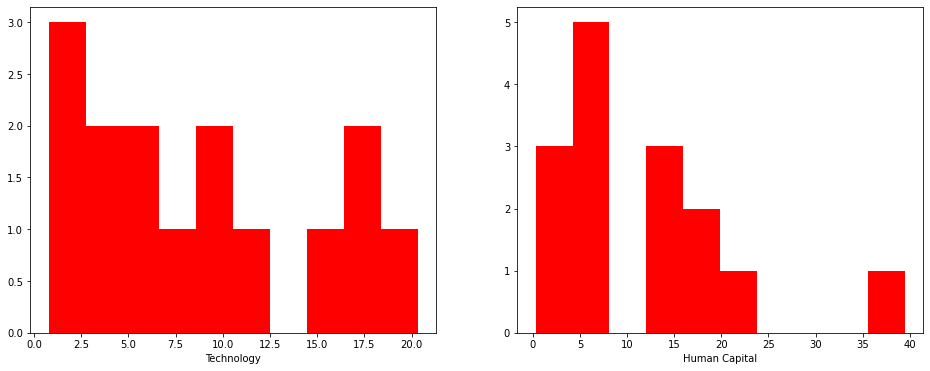

In [122]:
plt.figure(figsize =(16,6))

plt.subplot(1,2,1)
plt.hist(test0_ANN['Error(%)'], color ='r');
plt.xlabel('Technology')

plt.subplot(1,2,2)
plt.hist(test1_ANN['Error(%)'], color ='r');
plt.xlabel('Human Capital')

Text(0.5, 0, 'Human Capital')

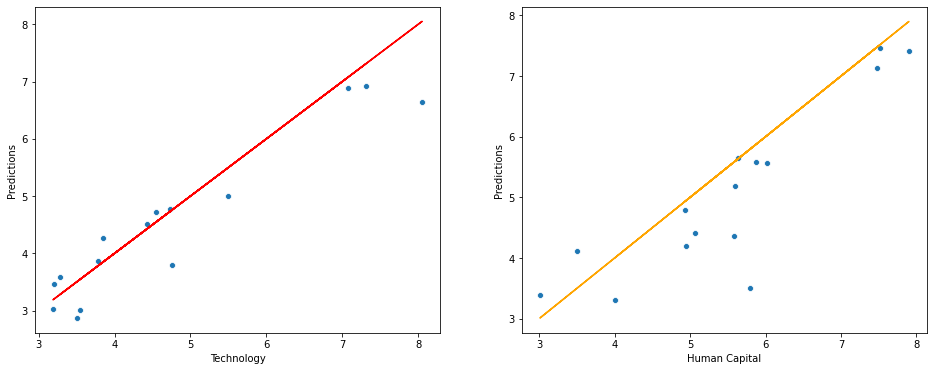

In [126]:
plt.figure(figsize =(16,6))


plt.subplot(1,2,1)
sns.scatterplot(data =test0_ANN, x = 'TrueValues', y = 'Predictions')
plt.plot(test0_ANN['TrueValues'], test0_ANN['TrueValues'], c = 'red')
plt.xlabel('Technology')

plt.subplot(1,2,2)
sns.scatterplot(data =test1_ANN, x = 'TrueValues', y = 'Predictions' )
plt.plot(test1_ANN['TrueValues'], test1_ANN['TrueValues'], c = 'orange')
plt.xlabel('Human Capital')